In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

pd.set_option('display.max_columns', None) # max_rows도 o (다보여주기! 숫자도 넣을수o)

In [2]:
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

# 고객 당 한줄로 표현해야 feature로 쓸 수 있다.!!!!!!!!!!

In [3]:
tr = pd.read_csv('./data/train_transactions.csv', encoding='cp949') # ../ 에서 ./로 바꿈
# tr_test = pd.read_csv('../data/test_transactions.csv', encoding='cp949')
# y_train = pd.read_csv('../data/y_train.csv').gender
# IDtest = tr_test.cust_id.unique()

# tr_train.head()

# Feature Generation
새로 만든 feature와 병합할 고객 ID로만 이루어진 데이터프레임을 만든다.

In [4]:
tr

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000
3,0,2007-03-30 00:00:00,강남점,342205,니 트,시티웨어,840000
4,0,2007-03-30 00:00:00,강남점,342220,상품군미지정,기타,20000
...,...,...,...,...,...,...,...
231999,3499,2007-12-17 00:00:00,본 점,127129,상품군미지정,기타,-135000
232000,3499,2007-12-23 00:00:00,노원점,285136,시티웨어,시티웨어,6380000
232001,3499,2007-12-23 00:00:00,노원점,39107,야채,농산물,40800
232002,3499,2007-12-27 00:00:00,본 점,740120,어덜트,명품,4880000


In [5]:
features = pd.DataFrame({'cust_id':tr.cust_id.unique()})

In [6]:
features

,cust_id
0,0
1,1
2,2
3,3
4,4
...,...
3495,3495
3496,3496
3497,3497
3498,3498


- unique() 처리 이후 232004 rows --> 3500 rows

# Numeric Features

## [파생변수 1-4] 
- 총구매액, 구매건수, 평균구매액, 최대구매액

### 연습

- `df.groupby(["~를"])["~로"]` --> 이렇게 활용하면 된다!

- `agg함수` --> 여러가지 계산 가능! 내가 원하는 다양한 수치를 얻을 수 있다!

- `set_index()` --> 행번호 인덱스가 아닌 컬럼명을 지정한 인덱스가 생성
- `reset_index()` --> 컬럼명 인덱스가 아닌 행 번호 인덱스로 사용하고 싶은 경우..에도 사용 가능!

https://ponyozzang.tistory.com/617

In [11]:
a = tr.groupby('cust_id')['amount'].agg([('총구매액', np.sum), ('구매건수', np.size), ('평균구매액', lambda x: np.round(np.mean(x)))])

In [12]:
a

,총구매액,구매건수,평균구매액
cust_id,,,
0,68282840,74,922741.0
1,2136000,3,712000.0
2,3197000,4,799250.0
3,16077620,44,365400.0
4,29050000,3,9683333.0
...,...,...,...
3495,3175200,2,1587600.0
3496,29628600,13,2279123.0
3497,75000,1,75000.0


In [13]:
a.reset_index()

,cust_id,총구매액,구매건수,평균구매액
0,0,68282840,74,922741.0
1,1,2136000,3,712000.0
2,2,3197000,4,799250.0
3,3,16077620,44,365400.0
4,4,29050000,3,9683333.0
...,...,...,...,...
3495,3495,3175200,2,1587600.0
3496,3496,29628600,13,2279123.0
3497,3497,75000,1,75000.0
3498,3498,1875000,2,937500.0


### 실습

In [7]:
# 이름까지 지으려면 이렇게 쓰는게 좋을듯
f = tr.groupby('cust_id')['amount'].agg([
    ('총구매액',np.sum), 
    ('구매건수', np.size), 
    ('평균구매액', lambda x: np.round(np.mean(x))),
    ('최대구매액', np.max),
]).reset_index()

In [8]:
f

,cust_id,총구매액,구매건수,평균구매액,최대구매액
0,0,68282840,74,922741.0,11264000
1,1,2136000,3,712000.0,2136000
2,2,3197000,4,799250.0,1639000
3,3,16077620,44,365400.0,4935000
4,4,29050000,3,9683333.0,24000000
...,...,...,...,...,...
3495,3495,3175200,2,1587600.0,3042900
3496,3496,29628600,13,2279123.0,7200000
3497,3497,75000,1,75000.0,75000
3498,3498,1875000,2,937500.0,1000000


In [9]:
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액
0,0,68282840,74,922741.0,11264000
1,1,2136000,3,712000.0,2136000
2,2,3197000,4,799250.0,1639000
3,3,16077620,44,365400.0,4935000
4,4,29050000,3,9683333.0,24000000
...,...,...,...,...,...
3495,3495,3175200,2,1587600.0,3042900
3496,3496,29628600,13,2279123.0,7200000
3497,3497,75000,1,75000.0,75000
3498,3498,1875000,2,937500.0,1000000


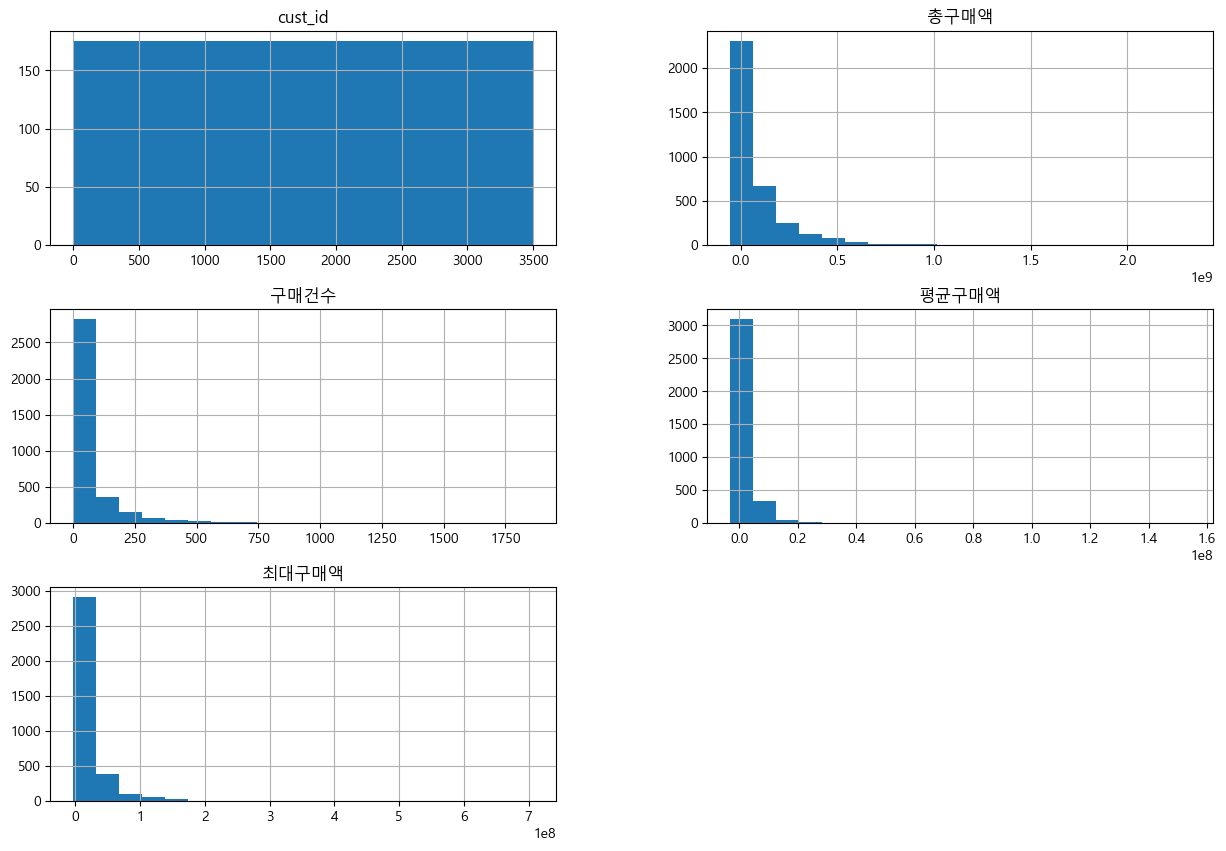

In [10]:
# histogram
f.hist(bins=20, figsize=(15,10))
plt.show()

## [파생변수 5-7] 
- 구매상품종류(goods_id, gds_grp_nm, gds_grp_mclas_nm 각각)

### 연습

In [12]:
gds_grp_nm = pd.DataFrame({'구매상품종류':tr.gds_grp_nm.unique()})

In [13]:
gds_grp_nm

,구매상품종류
0,기초 화장품
1,니 트
2,상품군미지정
3,디자이너부틱
4,비지니스군
...,...
319,악기
320,남성시티 직매입
321,영플라자 (올리브핫스텁)
322,주얼리멀티


In [15]:
goods = tr[['goods_id', 'gds_grp_nm', 'gds_grp_mclas_nm']] # 필요한 열 추출하기 / https://zephyrus1111.tistory.com/43 참고
goods

,goods_id,gds_grp_nm,gds_grp_mclas_nm
0,127105,기초 화장품,화장품
1,342220,니 트,시티웨어
2,127105,기초 화장품,화장품
3,342205,니 트,시티웨어
4,342220,상품군미지정,기타
...,...,...,...
231999,127129,상품군미지정,기타
232000,285136,시티웨어,시티웨어
232001,39107,야채,농산물
232002,740120,어덜트,명품


In [ ]:
# 컬럼명 변경
# goods.columns = ['구매상품아이디', '구매상품그룹이름', '구매상품클래스이름']

### 실습

In [17]:
# 따로따로 각각 담기! > agg해보기
f = tr.groupby('cust_id')['goods_id'].nunique().reset_index() # nunique(): 데이터에 고유값들의 수를 출력해주는 함수
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,goods_id
0,0,68282840,74,922741.0,11264000,35
1,1,2136000,3,712000.0,2136000,2
2,2,3197000,4,799250.0,1639000,1
3,3,16077620,44,365400.0,4935000,24
4,4,29050000,3,9683333.0,24000000,2
...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.0,3042900,1
3496,3496,29628600,13,2279123.0,7200000,9
3497,3497,75000,1,75000.0,75000,1
3498,3498,1875000,2,937500.0,1000000,1


In [18]:
f = tr.groupby('cust_id')['gds_grp_nm'].nunique().reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,goods_id,gds_grp_nm
0,0,68282840,74,922741.0,11264000,35,28
1,1,2136000,3,712000.0,2136000,2,2
2,2,3197000,4,799250.0,1639000,1,2
3,3,16077620,44,365400.0,4935000,24,20
4,4,29050000,3,9683333.0,24000000,2,3
...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.0,3042900,1,2
3496,3496,29628600,13,2279123.0,7200000,9,7
3497,3497,75000,1,75000.0,75000,1,1
3498,3498,1875000,2,937500.0,1000000,1,1


In [19]:
f = tr.groupby('cust_id')['gds_grp_mclas_nm'].nunique().reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,goods_id,gds_grp_nm,gds_grp_mclas_nm
0,0,68282840,74,922741.0,11264000,35,28,17
1,1,2136000,3,712000.0,2136000,2,2,2
2,2,3197000,4,799250.0,1639000,1,2,2
3,3,16077620,44,365400.0,4935000,24,20,13
4,4,29050000,3,9683333.0,24000000,2,3,3
...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.0,3042900,1,2,2
3496,3496,29628600,13,2279123.0,7200000,9,7,5
3497,3497,75000,1,75000.0,75000,1,1,1
3498,3498,1875000,2,937500.0,1000000,1,1,1


In [20]:
features.rename(columns={'goods_id' : '구매상품',
                        'gds_grp_nm' : '구매상품그룹',
                        'gds_grp_mclas_nm' : '구매상품클래스'}, inplace=True)

In [20]:
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품,구매상품그룹,구매상품클래스
0,0,68282840,74,922741.0,11264000,35,28,17
1,1,2136000,3,712000.0,2136000,2,2,2
2,2,3197000,4,799250.0,1639000,1,2,2
3,3,16077620,44,365400.0,4935000,24,20,13
4,4,29050000,3,9683333.0,24000000,2,3,3
...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.0,3042900,1,2,2
3496,3496,29628600,13,2279123.0,7200000,9,7,5
3497,3497,75000,1,75000.0,75000,1,1,1
3498,3498,1875000,2,937500.0,1000000,1,1,1


## [파생변수 8-14] 
- 내점일수, 구매주기, 주말방문비율, 계절별 구매비율(Spring(3-5)/Summer(6-8)/Fall(9-11)/Winter(12-2))

pandas 일자와 시간 처리법
- 참고: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221603462366

In [ ]:
# 날짜 최대, 최소 찾기 > 달력보고 토일 날짜 찾기.. 이렇게 해야 하나? / datetime weekday

In [54]:
# 방문수
visit_count = tr.groupby('cust_id')['amount'].nunique().reset_index() # ['tran_date'] 로 했더니 같은날 여러번 쇼핑한거 파악x
visit_count

,cust_id,amount
0,0,66
1,1,3
2,2,4
3,3,41
4,4,3
...,...,...
3495,3495,2
3496,3496,13
3497,3497,1
3498,3498,2


In [49]:
tr_copy = tr.copy()
tr_copy['tran_date'] = pd.to_datetime(tr_copy['tran_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
tr_copy['tran_date_weekday'] = tr_copy['tran_date'].dt.weekday
tr_copy['visit_weekend'] = tr_copy['tran_date_weekday'].apply(lambda x: 1 if (x == 5 or x == 6) else 0)

In [42]:
tr_copy

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount,tran_date_weekday,visit_weekend
0,0,2007-01-19,강남점,127105,기초 화장품,화장품,850000,4,0
1,0,2007-03-30,강남점,342220,니 트,시티웨어,480000,4,0
2,0,2007-03-30,강남점,127105,기초 화장품,화장품,3000000,4,0
3,0,2007-03-30,강남점,342205,니 트,시티웨어,840000,4,0
4,0,2007-03-30,강남점,342220,상품군미지정,기타,20000,4,0
...,...,...,...,...,...,...,...,...,...
231999,3499,2007-12-17,본 점,127129,상품군미지정,기타,-135000,0,0
232000,3499,2007-12-23,노원점,285136,시티웨어,시티웨어,6380000,6,1
232001,3499,2007-12-23,노원점,39107,야채,농산물,40800,6,1
232002,3499,2007-12-27,본 점,740120,어덜트,명품,4880000,3,0


In [56]:
# 주말 방문수
visit_weekend_count = tr_copy.groupby('cust_id')['visit_weekend'].sum().reset_index()
visit_count = visit_count.merge(visit_weekend_count, how='left'); visit_count

,cust_id,amount,visit_weekend
0,0,66,39
1,1,3,0
2,2,4,0
3,3,41,14
4,4,3,0
...,...,...,...
3495,3495,2,2
3496,3496,13,6
3497,3497,1,0
3498,3498,2,0


[파생변수 15-16] 환불금액, 환불건수

In [21]:
# copy해서 되나? tr원형 건드리지 않게 하는게 좋은건가? 그냥 해도 되나?
tr_copy = tr.copy()
tr_copy['refund'] = np.where(tr_copy['amount']<0, tr_copy['amount'], 0)
tr_copy

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount,refund
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000,0
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000,0
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000,0
3,0,2007-03-30 00:00:00,강남점,342205,니 트,시티웨어,840000,0
4,0,2007-03-30 00:00:00,강남점,342220,상품군미지정,기타,20000,0
...,...,...,...,...,...,...,...,...
231999,3499,2007-12-17 00:00:00,본 점,127129,상품군미지정,기타,-135000,-135000
232000,3499,2007-12-23 00:00:00,노원점,285136,시티웨어,시티웨어,6380000,0
232001,3499,2007-12-23 00:00:00,노원점,39107,야채,농산물,40800,0
232002,3499,2007-12-27 00:00:00,본 점,740120,어덜트,명품,4880000,0


In [22]:
# 환불금액
f = tr_copy.groupby('cust_id')['refund'].sum().reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품,구매상품그룹,구매상품클래스,refund
0,0,68282840,74,922741.0,11264000,35,28,17,-6860000
1,1,2136000,3,712000.0,2136000,2,2,2,-300000
2,2,3197000,4,799250.0,1639000,1,2,2,0
3,3,16077620,44,365400.0,4935000,24,20,13,0
4,4,29050000,3,9683333.0,24000000,2,3,3,0
...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.0,3042900,1,2,2,0
3496,3496,29628600,13,2279123.0,7200000,9,7,5,-6049600
3497,3497,75000,1,75000.0,75000,1,1,1,0
3498,3498,1875000,2,937500.0,1000000,1,1,1,0


In [27]:
# 환불건수
tr_copy['refund1'] = np.where(tr_copy['amount']<0, tr_copy['amount'], 0)
f = tr_copy.groupby('cust_id')['refund1'].nunique().reset_index()
features = features.merge(f, how='left'); features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품,구매상품그룹,구매상품클래스,refund,refund1
0,0,68282840,74,922741.0,11264000,35,28,17,-6860000,4
1,1,2136000,3,712000.0,2136000,2,2,2,-300000,2
2,2,3197000,4,799250.0,1639000,1,2,2,0,1
3,3,16077620,44,365400.0,4935000,24,20,13,0,1
4,4,29050000,3,9683333.0,24000000,2,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.0,3042900,1,2,2,0,1
3496,3496,29628600,13,2279123.0,7200000,9,7,5,-6049600,2
3497,3497,75000,1,75000.0,75000,1,1,1,0,1
3498,3498,1875000,2,937500.0,1000000,1,1,1,0,1


In [28]:
features.rename(columns={'refund' : '환불금액',
                        'refund1' : '환불건수'}, inplace=True)

In [29]:
features

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품,구매상품그룹,구매상품클래스,환불금액,환불건수
0,0,68282840,74,922741.0,11264000,35,28,17,-6860000,4
1,1,2136000,3,712000.0,2136000,2,2,2,-300000,2
2,2,3197000,4,799250.0,1639000,1,2,2,0,1
3,3,16077620,44,365400.0,4935000,24,20,13,0,1
4,4,29050000,3,9683333.0,24000000,2,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,2,1587600.0,3042900,1,2,2,0,1
3496,3496,29628600,13,2279123.0,7200000,9,7,5,-6049600,2
3497,3497,75000,1,75000.0,75000,1,1,1,0,1
3498,3498,1875000,2,937500.0,1000000,1,1,1,0,1


[파생변수 17-18] 내점 당 구매액, 구매건수

[파생변수 19-24] 최근 3개월, 6개월, 12개월 구매금액 및 구매건수

# Categorical Features

[파생변수 25] 주구매 상품: 가장 많이 구매한 상품(gds_grp_mclas_nm)

In [ ]:
# 버거지수

[파생변수 26] 주구매 지점

[파생변수 27-35] 추가로 새로운 파생변수를 제안하고 구현해야 함! 아래는 예시.

- 구매추세 패턴
- 가격선호도 (예: 고가상품구매율)
- 시즌 선호도(어떤 시즌을 가장 선호하는지)
- 휴면(또는 이탈) 여부
- Top-10 베스트 셀러(gds_grp_mclas_nm)에 대한 구매 금액/건수/여부
- 상품별 구매순서
- 주구매 요일

배운점
- reset_index 쓰는 이유: merge해주려면 공통 분모가 필요한데, reset_index하면 인덱스값이 컬럼화가 되어서 merge할 수 있게 됨(cust_id있으면)

In [ ]:
# lambda 구조
if
else:
    if
    else


In [ ]:
# 칼럼새로 만드러!! 굳이 카피 안해도됨
# 환불금액 > 양수로 만들어주기!

In [ ]:
# agg전에 특정 컬럼 지정 안해주면..그럴 수 있음
f.columns.droplevel() # 컬럼이 여러줄 생기는데 위에 컬럼 없애줌

In [ ]:
f = df_top10.groupby(‘user_id’)['여기이이이!!!'].agg({
    ‘category_code’ : [(‘c_category_code’, lambda x: x.nunique()),
                       (‘category_code_max’, lambda x: x.value_counts().index[0]),
                       (‘category_code_min’, lambda x: x.value_counts().index[-1])],
    ‘user_session’ : [(‘c_user_session’, lambda x: x.count()),
                      (‘number_behavior’, lambda x: x.nunique())],
    ‘product_id’ : [(‘상품종류’, lambda x: x.nunique())],
    ‘weekday’ : [(‘weekday_max’, lambda x: max(x))],
    ‘time’ : [(‘time_max’, lambda x: max(x))]
}) # reset_index도 밑에서 따로 해줘야 됨
f.columns = f.columns.droplevel()  # 동일한 코드: f.columns = [j for _, j in f.columns]
f=f.reset_index()
df_user_id = df_user_id.merge(f, how=‘left’)

In [ ]:
# 변수명은 영어로
# 처음에 cust_id 기준 잡아주기
#내점일수: 백화점 방문한 일수
#수치형 변수/ 범주형변수
# 구매주기: 가장 최근-옛날....
# count / value_counts(가장많은것부터 내림차순해줌) 차이알기(뒤에 inex쓰는거 해보기!)
# r=tr[tr.amount > value] >>> 불리언인덱싱
# 숫자>문자 >>>범주형으로바꿔준거임
# 상관관계 높은거 여러개 컬럼이/ㅅ으며 하나만 해줘야 됨(트ㄱ성비슷) > 학습이 많이되서 과적합될수있음(피처 여러개면 그만큼 가중치 많이주니까)

정규화

In [ ]:
#standardization
# 정규화를 하는 이유 : 큰값에 가중치를 많이 주는데 정규분포 따르면...평균0.. 기준 맞춰주면 ...피처의 중요도, 가중치 알맞게 줄수있음(standardization > 평균0편차1 >범주령데이터엔x)
# 데이터가 평등해진다!

In [ ]:
# minmax normalization
# 너무 큰 최대 or 너무 작은 최소이면 데이터가 불균형해짐

In [ ]:
#maxabscxaler

#pycaret.. > compare_models() 이게 좋음 > 어떤 스케일러 쓰면 가장 좋은 성능인지 대충 알 수있음.. 데이터처리하고 이걸로 돌려보면 굿!ㅠ

In [ ]:
# 결측치..제거느느 최대한 하지x > 데이터,피처 많은게 좋음!(하지만 행전체가 결측치일땐 제거해라!
# threshold > 한계점,임계점,허용시점(t=5 > 결측치 5개 넘어가면 너 아웃 like 야구 삼진아웃)
# 오빠가 젤 많이 사용하는. scikitlearn simpleimputer . knn임퓨터(비지도학습일때 동일한 집단이면 포함..군집/ 임퓨터는 (knn인지이터레이터인지...) 값이 nan이면.. 얘 제외하고 컬럼들 값.. 다른 행이랑 비교해서 젤비슷한거 근사값 넣어줌) > 범주혀에선x
# value_counts.index([0]) > 최빈값임
#word to vector
#fillna(0) 으로 채우지 마라!

In [ ]:
# 범주형, 수치형 나눠서 따로따로 적용하면 됨!

In [ ]:
# 범주형 데이터는 > get_dummies / one-hot encoding